In [1]:
from neural_priors.utils.plotting import plot_prf_predictions
from neural_priors.utils.data import Subject, get_all_subject_ids, get_all_behavioral_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
from scipy import stats, odr
from braincoder.models import LogGaussianPRF, GaussianPRF
from braincoder.optimize import ParameterFitter
from braincoder.utils import get_rsq
#
plt.rcParams['legend.frameon'] = False
np.set_printoptions(linewidth=140)
pd.set_option('display.width', 170) # 80
pd.options.mode.copy_on_write = True
pd.set_option('display.max_columns', 70)

/Users/apc/Documents/Neuro/numerosity-fmri/neural_priors/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bids_folder = '../../ds-neuralpriors'

In [37]:
subject = '07'

In [110]:
sub = Subject(subject, bids_folder=bids_folder)
data = sub.get_single_trial_estimates(None, smoothed='smoothed', roi='NPCr')
behavior = sub.get_behavioral_data(session=None,) # tasks=['estimation_task', ])
paradigm = behavior['n']
data = pd.DataFrame(data, index=[ behavior['range'], behavior['n'] ] )


In [113]:
data.loc['narrow']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891
n,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20.0,0.871970,1.165343,1.040462,1.260623,-0.017238,0.007117,0.645588,1.249040,0.938919,0.069423,0.207812,0.166799,0.837704,0.993682,0.606576,0.264002,0.229874,1.181929,0.809556,0.381799,0.250465,0.272712,0.170485,0.110546,0.160259,0.098526,-0.113158,-0.146202,0.272213,-0.408000,-0.196903,0.676728,0.676758,0.495603,0.225853,...,1.334090,0.122091,0.448534,-0.347950,0.288462,-0.409932,0.320077,0.102100,-2.248313,-1.238661,0.698468,0.281249,0.618096,0.171587,0.568847,0.590601,0.315736,0.651555,0.585631,-0.066927,0.282543,0.442805,-1.152378,-2.303395,0.706598,0.171979,0.673107,0.254443,0.444499,0.504600,0.344808,-1.835630,0.658542,-1.086891,0.309649
15.0,1.399522,2.051734,1.550085,1.488608,-0.087135,-0.130695,1.126878,1.398125,0.706610,-0.250374,-0.050778,0.453450,1.169177,0.759038,0.246584,-0.420741,-0.150287,1.047849,0.199077,0.044885,-0.292862,-0.512210,-0.386393,0.160932,-0.052901,-0.410023,-0.599054,0.202860,0.188302,-0.493035,-0.117148,0.767492,1.195756,0.897806,0.433498,...,-0.520618,0.358556,-0.596855,-0.058826,0.626525,0.034119,2.092235,1.642467,2.559713,1.421416,0.636347,0.902497,0.209043,1.291549,1.097592,0.275052,0.885657,1.086009,0.186629,-0.120892,0.355785,0.482151,1.370470,2.896719,2.575090,1.374587,1.968722,0.331149,1.118880,0.267346,0.287706,2.449745,2.407680,1.094303,1.072337
22.0,0.768175,1.829253,1.670954,1.173559,0.484303,0.401122,0.667745,0.787894,0.804390,0.501036,0.272792,0.225116,0.701723,0.745286,0.541486,0.221738,-0.049262,0.420615,0.539569,0.373568,0.211674,-0.080082,-0.127569,0.196731,0.366129,0.197894,0.429845,0.046533,0.485165,1.438646,-0.146337,0.550157,1.187663,0.887073,0.684114,...,0.314903,0.282067,0.025119,0.035767,-0.070843,0.013678,1.292094,1.424320,2.667109,1.595200,0.074573,0.743459,0.458646,0.885636,1.161727,0.489240,0.869457,1.552501,0.150496,-0.415177,-0.093397,0.019428,0.516091,2.100462,1.923000,1.237500,1.384661,0.750797,0.654309,0.157971,-0.041696,1.500509,2.148448,0.553590,0.935373
16.0,-0.809639,-0.801213,-0.916221,-0.875338,-0.576274,-0.278387,-0.990288,-0.723268,-0.633207,-0.596945,-0.363215,-0.568526,-1.151862,-0.714687,-0.523464,-0.676068,-0.388802,-1.137716,-0.751166,-0.513234,-0.670421,-0.707044,-0.394772,-0.497683,-0.501395,-0.511743,-0.253248,-0.534010,-0.517909,0.248716,-0.570191,-0.463937,-0.322347,-0.565984,-0.365563,...,-0.006138,0.379696,0.385477,-0.343564,-0.225356,-0.151143,0.895398,1.144700,1.987610,1.628018,0.326198,0.149383,0.086020,0.322171,-0.091413,0.383886,0.110175,0.036171,0.471038,-0.147652,-0.023827,0.373068,0.324820,2.840297,1.625221,0.910236,0.690567,0.165367,0.378223,0.396635,0.458893,2.008795,1.605574,0.564266,0.805918
20.0,0.126297,0.506986,0.819268,0.563458,0.037666,-0.032220,0.061618,-0.019358,-0.190460,-0.028520,-0.110865,-0.533496,0.004408,-0.132640,-0.554422,0.060223,0.048857,0.218535,0.210937,-0.429839,-0.138759,0.045018,0.003151,-0.128860,-0.037342,-0.003353,-0.317532,0.072149,0.108949,-0.499705,0.187213,-0.093073,0.140135,0.351537,0.394768,...,-0.262951,0.529510,0.452512,-0.377868,-0.532325,-0.405782,-1.019619,-0.558028,-0.662708,-0.107746,0.096157,0.114297,-0.143566,-0.081743,0.519997,-0.347694,-0.241566,0.643447,-0.292609,-0.121161,-0.310717,-0.515353,0.483940,-0.269617,0.011989,-0.167256,-0.381881,-0.163673,-0.473620,0.021011,-0.163193,0.010407,-0.367812,0.067526,-0.458591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17.0,-1.104321,-0.746667,-0.789665,-0.842076,-0.458945,-0.066685,-0.764548,-0.62503

In [126]:
mean_resp = data.groupby(['range','n']).mean()
var_resp = data.groupby(['range','n']).var()
std_resp = data.groupby(['range','n']).std()

In [125]:
mean_resp

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14   \
range  n                                                                                                                                                            
narrow 10.0  0.541841  0.759089  0.654960  0.585932 -0.023761  0.081204  0.572406  0.458662  0.211311 -0.087425 -0.035484  0.333659  0.519880  0.228993  0.001679   
       11.0  0.667162  0.873226  0.700650  0.624956  0.092547  0.029277  0.419120  0.535511  0.242354 -0.022839 -0.013801 -0.001713  0.276419  0.283681  0.004725   
       12.0  0.781980  0.864494  0.752040  0.697982  0.192288  0.103098  0.623789  0.567441  0.220293  0.118755  0.029053  0.272678  0.510980  0.296796  0.037528   
       13.0  0.182501  0.247110  0.253755  0.138214  0.318303  0.171594 -0.083083 -0.010025  0.116741  0.253486  0.167834 -0.200207 -0.211070  0.018041  0.090960   
       14.0  0.534411  0.710674  0.658597  0.643349  0.175110  0.084467  0.422026  0.479128  0.278579  0.108437  0.007936  0.165067  0.423629  0.250381  0.117142   
       15.0  0.428025  0.404832  0.178101  0.111901 -0.269820 -0.209309  0.177266  0.095299 -0.035398 -0.270804 -0.238778  0.029554  0.216849  0.036102 -0.116866   
       16.0  0.616754  0.793896  0.683494  0.636268  0.035917 -0.011249  0.447547  0.531535  0.234876 -0.048978 -0.029749  0.127108  0.526773  0.415349  0.104480   
       17.0  0.129540  0.187729  0.134781  0.054945 -0.068722 -0.052199  0.034644 -0.037823 -0.057605 -0.104588 -0.064846 -0.085976 -0.056338 -0.124276 -0.113450   
       18.0  0.490214  0.728122  0.639937  0.676903  0.170533  0.133858  0.493994  0.615274  0.386954  0.096250  0.083458  0.064568  0.350157  0.425824  0.211954   
       19.0  0.525878  0.551485  0.414375  0.371287 -0.214432 -0.217421  0.402366  0.368210  0.022013 -0.211663 -0.199796  0.184211  0.512867  0.201330 -0.125016   
       20.0  0.303604  0.474587  0.353088  0.223858 -0.106468 -0.070093  0.170948  0.142524  0.030023 -0.145843 -0.018735 -0.093259  0.182991  0.166012 -0.015131   
       21.0  0.270834  0.384554  0.313421  0.247066  0.089869  0.044603  0.232801  0.195522  0.069462  0.018795  0.015051  0.044696  0.246975  0.156435  0.027449   
       22.0  0.654051  0.739907  0.640432  0.534271  0.076159  0.036331  0.537619  0.406686  0.157049  0.028415 -0.014532  0.350075  0.674330  0.332280  0.047413   
       23.0  0.434193  0.339585  0.153939  0.108725 -0.386628 -0.229389  0.379752  0.109539 -0.079973 -0.364130 -0.231102  0.329909  0.555929  0.106163 -0.122084   
       24.0  0.390192  0.151715  0.015789 -0.028567 -0.203875 -0.108875  0.274182  0.003730 -0.202383 -0.188736 -0.154316  0.153633  0.230556 -0.046218 -0.124675   
       25.0  1.025908  1.154862  1.053813  1.017459  0.250956  0.140827  0.824085  0.935037  0.533505  0.203769  0.153446  0.330728  0.910920  0.776583  0.355783   
wide   10.0  0.371416  0.537505  0.416474  0.290634 -0.203734 -0.222300  0.207212  0.138790 -0.013580 -0.295196 -0.322683  0.186067  0.183210  0.023510 -0.135354   
       11.0  0.853369  0.922149  0.795979  0.620915 -0.286941 -0.229906  0.598716  0.460743  0.140363 -0.242036 -0.126724  0.239435  0.549901  0.312063  0.019390   
       12.0  0.700170  1.078624  0.932231  0.833939  0.214624  0.172661  0.554604  0.671291  0.429695  0.114501  0.091226  0.175887  0.600907  0.455668  0.173136   
       13.0  0.874319  1.385944  1.246949  1.123649  0.421849  0.208187  0.858158  0.976253  0.678135  0.305258  0.130673  0.360003  0.930303  0.731090  0.364609   
       14.0  0.224724  0.412872  0.338846  0.177495  0.023341 -0.055113  0.118799  0.046165  0.000587 -0.004579 -0.033092 -0.057695  0.029197  0.008843 -0.068557   
       15.0  0.259501  0.274034  0.255007  0.259227  0.025327 -0.004302  0.232406  0.233399  0.168808 -0.061876 -0.105098  0.091472  0.084242  0.062954  0.074285   
       16.0  0.326020  0.466590  0.381857  0.324190 -0.077

In [118]:
print( stats.pearsonr(mean_resp.values.flatten(), std_resp.values.flatten()) )
stats.pearsonr(mean_resp.values.flatten(), var_resp.values.flatten())

PearsonRResult(statistic=0.18765959319606118, pvalue=0.0)


PearsonRResult(statistic=0.2045631058809687, pvalue=0.0)

In [121]:
for cond in ['narrow', 'wide']:
    print(cond)
    print( stats.pearsonr(mean_resp.loc[cond].values.flatten(), std_resp.loc[cond].values.flatten()) )
    print( stats.pearsonr(mean_resp.loc[cond].values.flatten(), var_resp.loc[cond].values.flatten()) )

narrow
PearsonRResult(statistic=0.2175291843763768, pvalue=1.8932497875630082e-152)
PearsonRResult(statistic=0.2356618342680201, pvalue=2.501295278373438e-179)
wide
PearsonRResult(statistic=0.18053617858986237, pvalue=2.9489511121191554e-201)
PearsonRResult(statistic=0.1934737289339311, pvalue=2.152378370726522e-231)


In [122]:
def odr_1dregression(x, y, data=None):
    if data is None:
        dat = odr.Data(x, y)
    else:
        dat = odr.Data(data[x], data[y])
    myodr = odr.ODR(dat, odr.unilinear, beta0=[1., 0.]) # start point = identity
    res = myodr.run()
    return res

def odr_pred(odr_res, x):
    B = odr_res.beta
    return B[0]*x + B[1]

narrow
Beta: [0.61949488 0.17912372]
Beta Std Error: [0.00886413 0.0022815 ]
Beta Covariance: [[ 0.00191226 -0.00023842]
 [-0.00023842  0.00012668]]
Residual Variance: 0.04108904335782576
Inverse Condition #: 0.3400631779893851
Reason(s) for Halting:
  Sum of squares convergence
PearsonRResult(statistic=0.2356618342680201, pvalue=2.501295278373438e-179)
wide
Beta: [0.26988781 0.14969037]
Beta Std Error: [0.00440091 0.00125438]
Beta Covariance: [[ 5.93371460e-04 -7.47145487e-05]
 [-7.47145487e-05  4.82056027e-05]]
Residual Variance: 0.03264055881131861
Inverse Condition #: 0.3228069816745384
Reason(s) for Halting:
  Sum of squares convergence
PearsonRResult(statistic=0.1934737289339311, pvalue=2.152378370726522e-231)


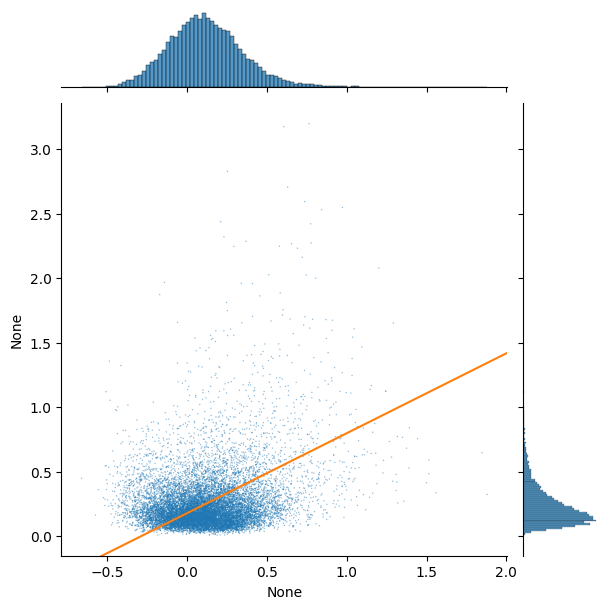

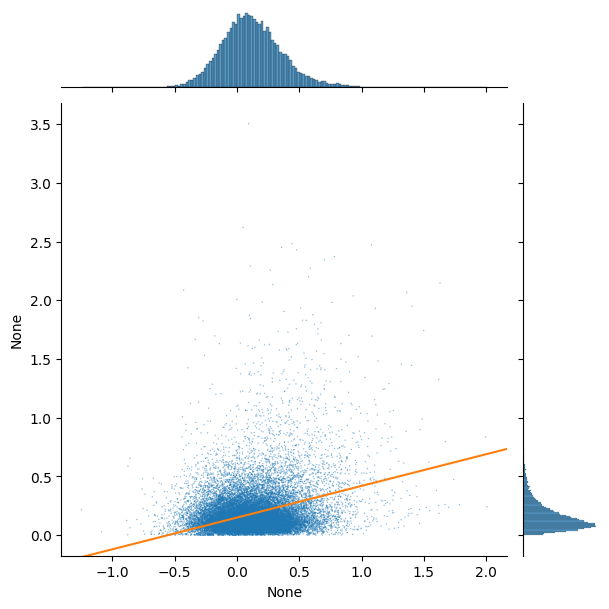

In [128]:
for cond in ['narrow', 'wide']:
    print(cond)
    res = odr_1dregression( x=mean_resp.loc[cond].values.flatten(), y=var_resp.loc[cond].values.flatten()); res.pprint()
    #for kwargs in [dict(s=1, ec='none', alpha=.5), dict(kind='hex'), dict(kind='kde')]:
    for kwargs in [dict(s=1, ec='none', alpha=.5),]:
        sns.jointplot(x=mean_resp.loc[cond].values.flatten(), y=var_resp.loc[cond].values.flatten(), **kwargs)
        #plt.ylim(-.5, 3)
        xlm = plt.xlim(); ylm = plt.ylim()
        plt.plot( xlm, odr_pred(res, np.array(xlm)), c='C1')
        plt.xlim(*xlm); plt.ylim(*ylm);
    print( stats.pearsonr(mean_resp.loc[cond].values.flatten(), var_resp.loc[cond].values.flatten()) )

In [129]:
load_data_via_tsv = True

if load_data_via_tsv:
    df = pd.read_csv(op.join(bids_folder, 'derivatives', 'encoding_model', 'npcr_parameters.tsv'), sep='\t',
                    index_col=[0, 1, 2, 3, 4, 5,],
                    dtype={'subject':str})
    df.columns.name = 'parameter'
    df.index.set_names('voxel', level=-1, inplace=True)
else:
    df = []
    keys = []
    subjects = [f'{subject:02d}' for subject in range(1, 11)]
    #subjects.pop(subjects.index('11'))
    #subjects.pop(subjects.index('16'))

    for subject, range_n, session, smoothed, gaussian in product(subjects, ['wide', 'narrow', None, 'wide2'], [None], [True, False], [False, True]):
    # for subject, range_n, session, smoothed in product(subjects, ['wide', 'narrow', None], [None], [True, False]):
        sub = Subject(subject, bids_folder)
        sub_df = sub.get_prf_parameters_volume(session=session, cross_validated=False, roi='NPCr', smoothed=smoothed, range_n=range_n, gaussian=gaussian)
        if gaussian:
            sub_df = sub_df.rename(columns={'mu':'mode', 'sd':'width'})
        else:
            sub_df = sub_df.rename(columns={'fwhm':'width'})
        df.append(sub_df)
        keys.append((subject,
                    range_n if range_n is not None else 'both', session if session is not None else 'both',
                    'smoothed' if smoothed else 'unsmoothed',
                    'gaussian' if gaussian else 'lognormal'))

    df = pd.concat(df, keys=keys, names=['subject', 'range_n', 'session', 'smoothed', 'model'])
    df.to_csv(op.join(bids_folder, 'derivatives', 'encoding_model', 'npcr_parameters.tsv'), sep='\t')

df = df.unstack(['range_n', 'model', ]).reorder_levels(axis='columns', order=['model', 'parameter', 'range_n'])
df = df.droplevel('session', axis=0)
df = df.sort_index(axis=1, level=['model'], sort_remaining=False)

In [130]:
dfs = df.xs('smoothed', level='smoothed', axis=0)
dfs

model           gaussian                                                                                                                                           \
parameter           mode                                      width                                 amplitude                                  baseline             
range_n             wide     narrow       both      wide2      wide     narrow      both      wide2      wide      narrow      both     wide2      wide    narrow   
subject voxel                                                                                                                                                       
01      0      37.364826  21.124500  37.348385  11.517796  0.341002   0.396827  0.346775   0.906162  1.438429    0.680798  1.289311  0.729588 -0.130019 -0.100848   
        1      33.824623   4.783791  33.821358  11.687057  0.691629   4.528500  0.667084   0.466805  0.748930    0.540905  0.723414  1.072110 -0.531615 -0.537404   
        2      28.557991  11.896777  28.558237  15.473819  0.415108   0.934195  0.399016   1.315624  0.991627    0.328446  0.965211  0.488749 -0.533834 -0.502003   
        3      15.576399  12.634756  15.078053  15.590551  1.232276   2.400554  1.203502   1.414796  0.484945    0.272006  0.293359  0.609456 -0.345589 -0.334171   
        4      11.836634   8.140844  11.579211  11.840950  0.779714   0.545360  1.052765   0.820746  0.961715  153.636470  0.375336  1.067275 -0.108668 -0.120475   
...                  ...        ...        ...        ...       ...        ...       ...        ...       ...         ...       ...       ...       ...       ...   
38      697    10.426326   4.564291   4.016433  10.449670  1.613101  26.400085  5.397981   1.640172  0.361253    1.929290  0.708828  0.374306  0.027523 -1.630308   
        698    33.229786   3.604554   4.515877  13.041175  0.794954  26.579262  3.128798  25.861330  0.306434    0.829503  0.997773  1.959751 -0.010555 -0.724373   
        699    32.148064   6.616162  32.144485  18.932497  1.559922   0.424628  1.571747   0.547694  0.319630    1.000023  0.323219  0.340539  0.006793  0.000684   
        700    10.515281  10.846213   4.627740  10.522858  0.415329  26.150427  3.319563   0.524882  0.751378    2.716299  1.347138  0.613012  0.028433 -2.522691   
        701    10.546851   9.609516   4.604275  10.553507  0.619145  26.092861  4.304541   0.686846  0.530955    2.709397  0.779349  0.526931  0.037476 -2.474706   

model                                                                                                                  lognormal                                   \
parameter                                r2                                        cvr2                                     mode                                    
range_n            both     wide2      wide        narrow      both     wide2      wide    narrow      both     wide2       wide     narrow       both      wide2   
subject voxel                                                                                                                                                       
01      0     -0.096930 -0.242621  0.025210  2.050889e-02  0.013219  0.031572 -0.010679 -0.037111 -0.013963 -0.150426  37.357880  21.101067  37.343750  11.424807   
        1     -0.504734 -0.641905  0.021125  9.863794e-03  0.011212  0.036705 -0.077199 -0.060669 -0.033635 -0.112344  33.805150   4.180238  33.803192  11.662571   
        2     -0.494730 -0.664774  0.028490  1.959443e-02  0.015095  0.043335 -0.078409 -0.051255 -0.040969 -0.139146  28.577208  11.842598  28.558933  15.337356   
        3     -0.312884 -0.462194  0.027097  2.759892e-02  0.014951  0.070238 -0.079311 -0.021471 -0.060922 -0.090663  15.417795  12.327776  15.034226  15.448602   
        4     -0.110317 -0.199313  0.027147  1.359481e-02  0.008204  0.050541 -0.054760 -0.026661 -0.040119 -0.100712  11.764568   8.172389  37.307003  11.772324   
...                 ...       ...      

In [131]:
# mask narrow good, mask wide good, mask both good, mask either one good
mask_ng = dfs[('gaussian', 'cvr2', 'narrow')] > 0.01
mask_wg = dfs[('gaussian', 'cvr2', 'wide')] > 0.01
mask_bg = (mask_ng & mask_wg)
mask_eg = (mask_ng | mask_wg)
print(mask_ng.sum(), mask_wg.sum(), mask_bg.sum(), mask_eg.sum(), 'over', len(mask_bg) )
print(mask_ng.mean(), mask_wg.mean(), mask_bg.mean(), mask_eg.mean())

3451 2642 968 5125 over 27327
0.1262853588026494 0.09668093826618362 0.035422841877996124 0.1875434551908369


In [132]:
dfs[mask_bg].index.get_level_values('subject').unique()

Index(['02', '04', '05', '07', '08', '09', '10', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '26', '28', '29', '30', '33', '36', '38'], dtype='object', name='subject')

In [133]:
dfs[mask_bg].groupby('subject').apply(lambda x: x.shape[0])

subject
02     12
04     18
05      3
07     89
08     17
09     26
10      2
12    173
13    175
14      6
15     10
16     26
17     12
18      1
19     94
20     36
21      2
22     48
24      1
26     20
28      6
29      1
30     75
33      3
36      1
38    111
dtype: int64

In [134]:
mask_bg.loc[subject]

voxel
0      False
1      False
2      False
3      False
4      False
       ...  
887    False
888    False
889     True
890    False
891     True
Length: 892, dtype: bool

In [135]:
mask_bg[mask_bg].loc[subject]

voxel
76     True
80     True
95     True
98     True
109    True
       ... 
881    True
883    True
885    True
889    True
891    True
Length: 89, dtype: bool

In [136]:
mean_resp.loc[:, mask_bg.loc[subject] ]

76        80        95        98        109       141       147       161       167       168       194       195       202       203       204  \
range  n                                                                                                                                                            
narrow 10.0  0.106076 -0.129129  0.116825  0.152225  0.289471  0.096647  0.233164  0.092028  0.155176  0.254337  0.239552  0.235087  0.217368  0.217458  0.245641   
       11.0  0.269677 -0.164573  0.297049  0.276944  0.689480  0.203167  0.267071  0.450939  0.459141  0.441105  0.571453  0.475157  0.421703  0.510801  0.514407   
       12.0  0.269571  0.036602  0.400065  0.417147  0.463642  0.098301  0.268463  0.392643  0.369459  0.501807  0.460053  0.552003  0.408183  0.478958  0.555056   
       13.0  0.205632  0.120870  0.054264  0.017786  0.375765  0.076749  0.168140  0.241928  0.240297  0.436083  0.417041  0.484025  0.188472  0.361589  0.503399   
       14.0  0.244412 -0.079277  0.198182  0.191937  0.461951  0.125013  0.114704  0.349942  0.396472  0.599324  0.507670  0.620412  0.464034  0.576706  0.710529   
       15.0 -0.027677 -0.103389 -0.141058 -0.124349  0.175928 -0.104878  0.089968  0.110524  0.192529  0.227895  0.295413  0.175105  0.218627  0.252884  0.274435   
       16.0  0.034486 -0.032714 -0.044271 -0.054238  0.074856 -0.026125  0.069219  0.049597  0.044214  0.067460  0.074950  0.001520  0.048388  0.092881  0.136231   
       17.0  0.067563 -0.097679 -0.058221 -0.040675 -0.040468 -0.112972  0.106693  0.054824  0.155748  0.175180  0.219810  0.252802  0.209634  0.194244  0.233104   
       18.0  0.118255  0.021593  0.207789  0.182879  0.451804  0.070684  0.236440  0.334989  0.276066  0.299242  0.311929  0.326235  0.231997  0.210094  0.292265   
       19.0  0.117191 -0.021706 -0.065593 -0.055147  0.183262  0.090988  0.045607  0.018827 -0.111917 -0.103766 -0.038156 -0.118935 -0.098961 -0.157911 -0.178614   
       20.0 -0.037198 -0.154413 -0.184963 -0.245511  0.066190 -0.035954  0.128303  0.135975  0.012150 -0.144375  0.131833 -0.116199  0.106668  0.038465 -0.074959   
       21.0 -0.069344 -0.031991 -0.049046 -0.050620  0.050979 -0.112395  0.044735  0.038240  0.062792  0.108571  0.081503 -0.035245  0.095566  0.091448  0.078076   
       22.0  0.013789  0.012810  0.115530  0.111916  0.115399 -0.109008  0.122393  0.145369  0.111847  0.139168  0.165182  0.129089  0.119983  0.100223  0.153823   
       23.0 -0.179439 -0.119894 -0.310892 -0.293237 -0.018041 -0.198109 -0.031913 -0.055551 -0.007627 -0.177235  0.008090 -0.217139  0.098097 -0.002741 -0.153825   
       24.0 -0.122851  0.097982 -0.150949 -0.119066 -0.006476 -0.062280  0.072844 -0.162720 -0.002566 -0.085276 -0.146702 -0.245648 -0.026801 -0.130236 -0.236860   
       25.0 -0.167469  0.325669 -0.016823  0.026843  0.085434 -0.139324  0.127471  0.091774 -0.067567 -0.148863 -0.014070 -0.236024  0.035776 -0.119595 -0.312193   
wide   10.0  0.241237 -0.195116  0.081858  0.106326  0.570410  0.241438  0.254736  0.327317  0.348638  0.251861  0.234306  0.263209  0.204033  0.247387  0.280906   
       11.0  0.061794 -0.203445 -0.169136 -0.199190  0.543797  0.211934  0.148387 -0.031929  0.068706 -0.074427  0.016847 -0.073251  0.199007  0.026601 -0.086878   
       12.0  0.193729  0.228402  0.192544  0.262048  0.262570  0.019143  0.250739  0.212639  0.248929  0.326862  0.352646  0.371330  0.386064  0.344363  0.436204   
       13.0  0.262806  0.177968  0.382669  0.296486  0.688521  0.304995  0.318839  0.401461  0.399584  0.541981  0.506588  0.545017  0.423716  0.519759  0.694258   
       14.0  0.158497  0.024768  0.235799  0.232799 -0.079609 -0.047835  0.214931  0.249347  0.365483  0.312590  0.442519  0.290786  0.405001  0.474470  0.405531   
       15.0  0.104000 -0.073568  0.261504  0.239210  0.117089 -0.005754  0.177806  0.339462  0.342018  0.383868  0.394202  0.278491  0.335643  0.390350  0.405156   
       16.0 -0.035242 -0.106080  0.081655  0.021583  0.155

Beta: [0.18648249 0.19013176]
Beta Std Error: [0.00862386 0.00323685]
Beta Covariance: [[ 0.00246529 -0.00049634]
 [-0.00049634  0.0003473 ]]
Residual Variance: 0.030167295311444988
Inverse Condition #: 0.22667216110279245
Reason(s) for Halting:
  Sum of squares convergence


PearsonRResult(statistic=0.23088693331060037, pvalue=9.763558790646436e-52)

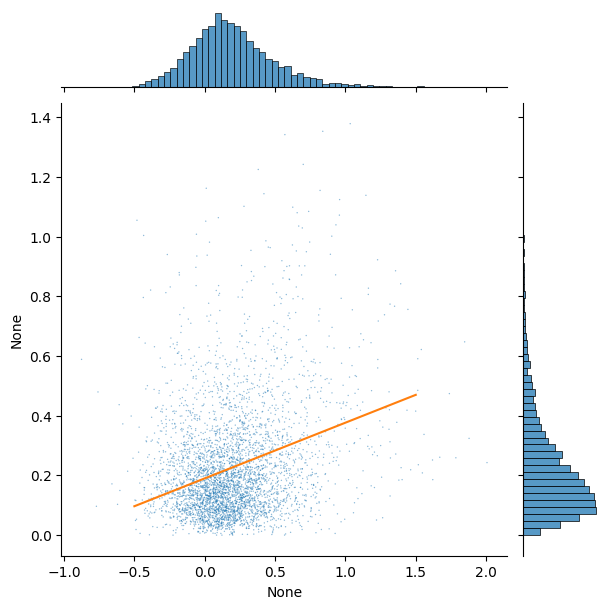

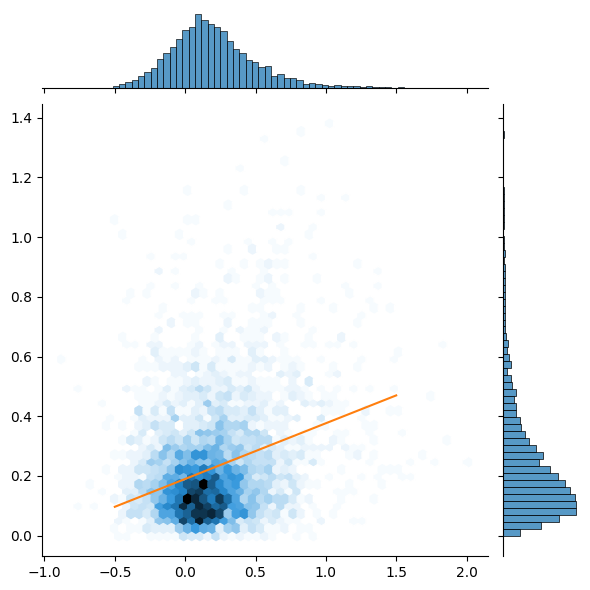

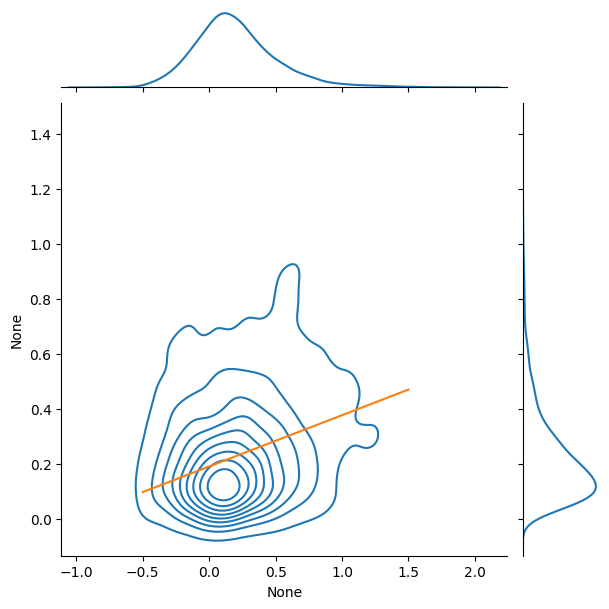

In [137]:
res = odr_1dregression( x=mean_resp.loc[:, mask_bg.loc[subject] ].values.flatten(), y=var_resp.loc[:, mask_bg.loc[subject] ].values.flatten()); res.pprint()
for kwargs in [dict(s=1, ec='none', alpha=.5), dict(kind='hex'), dict(kind='kde')]:
    sns.jointplot(x=mean_resp.loc[:, mask_bg.loc[subject] ].values.flatten(), y=var_resp.loc[:, mask_bg.loc[subject] ].values.flatten(), **kwargs)
    #plt.ylim(-.5, 3)
    xlm = plt.xlim(); ylm = plt.ylim()
    plt.plot( np.linspace(-.5,1.5), odr_pred(res, np.linspace(-.5,1.5)), c='C1')
    plt.xlim(*xlm); plt.ylim(*ylm);
stats.pearsonr(mean_resp.loc[:, mask_bg.loc[subject] ].values.flatten(), var_resp.loc[:, mask_bg.loc[subject] ].values.flatten())